Clayton Cohn<br>
22 Apr 2021<br>

#<center> NeuroFlow Data Team Take-Home Project: Part 1

The purpose of this notebook is to address Part 1 of the NeuroFlow Data Team Take-Home Project and provide my insights (both visually and via text) to the given dataset. I will also discuss assumptions I make about the data, as well as identify some additional pieces of information that would be important to collect.

This notebook is created with Google Colab. As such, I must first mount my Google Drive to import the dataset.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
DATA_PATH = "drive/My Drive/NeuroFlow/"
FILE_NAME = "phq_all_final.csv"

I will load the data into a Pandas DataFrame to conduct EDA.

In [3]:
import pandas as pd

df = pd.read_csv(DATA_PATH + FILE_NAME)
df.sample(5)

,date,patient_id,type,patient_date_created,score
27146,2020-05-28T16:39:31.894684,5194,gad7,2020-01-03T15:17:03.316997,7
28990,2020-02-11T19:15:51.303051,530,gad7,2020-01-10T21:17:09.504676,3
52935,2020-07-24T01:22:50.960044,1688,gad7,2020-07-01T15:20:44.524676,5
9159,2019-11-05T14:08:00.463023,17422,gad7,2019-09-10T12:58:53.28542,1
31639,2020-01-23T19:13:13.681589,9661,gad7,2020-01-23T17:00:00.058886,4


I will inspect the data to see if there are any ```null``` values, and I will also take a look at the size of the DataFrame. It also appears that the "type" column is unnecessary, as all type attributes are "gad7." After confirming this, I will drop the column.

In [4]:
print("Any nulls? ", df.isnull().values.any())

Any nulls?  False


In [5]:
print("Shape:", df.shape)
print(df.info())

Shape: (53698, 5)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53698 entries, 0 to 53697
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   date                  53698 non-null  object
 1   patient_id            53698 non-null  int64 
 2   type                  53698 non-null  object
 3   patient_date_created  53698 non-null  object
 4   score                 53698 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 2.0+ MB
None


In [6]:
print("Unique labels:")
sorted(df.type.unique())

Unique labels:


['gad7']

In [7]:
df.drop(labels=["type"], axis=1, inplace=True)
df.head(5)

,date,patient_id,patient_date_created,score
0,2019-08-26T13:32:43.019162,8430,2019-06-03T13:23:02.63568,6
1,2019-11-15T17:55:11.364877,8430,2019-06-03T13:23:02.63568,1
2,2019-10-07T18:23:29.611351,14338,2019-06-03T13:32:30.66846,10
3,2019-11-04T20:16:28.610965,14338,2019-06-03T13:32:30.66846,7
4,2019-12-02T20:56:55.966354,14338,2019-06-03T13:32:30.66846,9


The date column also needs to be formatted, as it is not in an ideal state from which to conduct analysis. Before formatting the date, I want to enumerate the following assumptions that I am making about the data and the objective(s) of the assignment:

1.   We are concerned with analyzing and visualizing the *overall* progress made by patients over time as a whole.  
2.   The particular hour of each day that a test was given is not meaningful for the purposes of this analysis.
3.   Progress should be illustrated for the aggregate, not the individual.
4.   The ```patient_date_created``` column is extraneous in this context, as I am only concerned with the dates that an actual assessment was given.
5.   What we are trying to visualize is not the average score over an absolute period of time, but rather the average improvements over a relative period of time.
6.   We are primarily concerned with the progress of those currently suffering from generalized anxiety disorder (i.e., patients with initial GAD-7 scores greater-than-or-equal-to 10).  

Although outside of the scope of this assignment, the time of day that the assessment was given could be considered for analysis on a patient-by-patient basis. Some patients may respond more favorably in the morning, for example. 

Additionally, the ```patient_date_created``` and ```date``` could also be considered in additional analyses to address potential causes of increased anxiety (such as Covid-19, for example).

In [8]:
df.drop(labels=["patient_date_created"], axis=1, inplace=True)
df.head(5)

,date,patient_id,score
0,2019-08-26T13:32:43.019162,8430,6
1,2019-11-15T17:55:11.364877,8430,1
2,2019-10-07T18:23:29.611351,14338,10
3,2019-11-04T20:16:28.610965,14338,7
4,2019-12-02T20:56:55.966354,14338,9


In [9]:
def formatDate(date):
	return pd.to_datetime(date.split("T")[0])

In [10]:
df["date"] = df["date"].apply(formatDate)
df.head(5)

,date,patient_id,score
0,2019-08-26,8430,6
1,2019-11-15,8430,1
2,2019-10-07,14338,10
3,2019-11-04,14338,7
4,2019-12-02,14338,9


Additionally, I will switch the column order for ease of use later on (when I break down the data by individual patient).

In [11]:
df = df.reindex(['patient_id','date','score'], axis=1)
df.head(5)

,patient_id,date,score
0,8430,2019-08-26,6
1,8430,2019-11-15,1
2,14338,2019-10-07,10
3,14338,2019-11-04,7
4,14338,2019-12-02,9


In [12]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53698 entries, 0 to 53697
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   patient_id  53698 non-null  int64         
 1   date        53698 non-null  datetime64[ns]
 2   score       53698 non-null  int64         
dtypes: datetime64[ns](1), int64(2)
memory usage: 1.2 MB
None


Now that the data is properly formatted, I can begin working on the actual analysis.

I first have to separate the data by ```patient_id```. The ```patients``` dictionary will consist of ```patient_id``` keys accompanied by value arrays of ("date", "time") tuples for each assessment. To do this, I must first sort the DataFrame by ```patient_id``` and ```date```.

In [13]:
df = df.sort_values(["patient_id", "date"], ascending = (True, True))
df.head(5)

,patient_id,date,score
21758,0,2019-12-31,1
21759,0,2020-01-29,0
21760,0,2020-02-26,0
21761,0,2020-03-27,0
21762,0,2020-04-24,1


In [14]:
patients = {}
for idx, row in df.iterrows():
  if row["patient_id"] in patients:
    patients[row["patient_id"]].append((row["date"], row["score"]))
  else:
    patients[row["patient_id"]] = [(row["date"], row["score"])]
print(patients[0])

[(Timestamp('2019-12-31 00:00:00'), 1), (Timestamp('2020-01-29 00:00:00'), 0), (Timestamp('2020-02-26 00:00:00'), 0), (Timestamp('2020-03-27 00:00:00'), 0), (Timestamp('2020-04-24 00:00:00'), 1), (Timestamp('2020-05-22 00:00:00'), 1)]


Now, we can see the progress of each individual patient. I provide an example below.

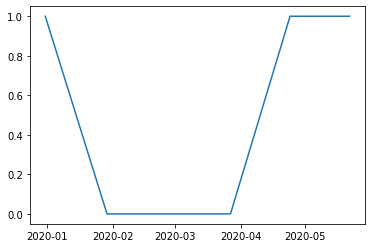

In [15]:
%matplotlib inline
import matplotlib.pyplot as plt

person = patients[0]
dates = [tup[0] for tup in person]
scores = [tup[1] for tup in person]

plt.plot(dates, scores)

In the above graph, ```patients[0]``` is shown as having six individual GAD-7 scores between the dates of 12-2019 and 05-2020, where he or she scored between 0 and 1 on all six assessments.

At this point, I want to shrink the ```patients``` dictionary to include only those patients starting with a GAD-7 score of 10 or higher. Pursuant to the aforementioned assumptions, I am trying to discern the average decrease (or increase) in anxiety levels of those individuals who **began therapy with preexisting anxiety.**

In [16]:
patients = {k:v for k,v in patients.items() if v[0][1] >= 10}
patients[1]

[(Timestamp('2020-04-05 00:00:00'), 10),
 (Timestamp('2020-04-11 00:00:00'), 11)]

There are also individuals that only have a single assessment. We are not interested in these individuals, as we are interested in the progress that is or is not made from instance to instance for a particular individual. As such, our ```patients``` dictionary will be amended to include only those individuals with two or more assessments.

In [17]:
patients = {k:v for k,v in patients.items() if len(v) > 1}

I am now going to format each patient's dates so that they are all in terms of the number of days that therapy had been going on for when the assessment was taken. It is assumed that that the first assessment for each user is the first day of therapy. 

In [18]:
for k, v in patients.items():
  first = v[0][0]
  for i in range(len(v)):
    days = v[i][0]-first
    patients[k][i] = (days.days,v[i][1])

This next part can and absolutely should be optimized, but in the interest of time I am just going to leave it as-is for now. I would not submit this for production.

This cell zeroes out each instance's dates, so each date is an integer representation of the number of days that have elapsed since the first assessment. As such, each patient's first assessment is always accomopanied by a 0.

In [19]:
diffs = []
for key in patients:
  p = patients[key]
  res = []
  i = 0
  j = 0
  while i < p[-1][0]:
    while j < len(p) and p[j][0] <= i: 
      j += 1
    res.append(p[j-1][1])
    i += 14
  i -= 14
  j -= 1
  res.append(p[-1][1])
  diff = [res[0]-res[i] for i in range(1,len(res))]
  diffs.append(diff)
  # 2 * (i+1)

I also need to make a note of the longest period that a patient participated in therapy, i.e., the greatest number of two-week intervals.

In [20]:
MAX_PERIODS = max([len(diff) for diff in diffs])

This next cell sums the total improvement across all patients for each two-week time interval. Simultaneously, I maintain a count of the number of people participating in therapy at each two-week interval so that I am able to calculate the mean later (again, this could also be refactored for optimization).

In [21]:
tot_gains = []
ns = []
for i in range(MAX_PERIODS):
  total = 0
  n = 0
  for diff in diffs:
    if i < len(diff):
      total += diff[i]
      n += 1
  tot_gains.append(total)
  ns.append(n)
print(ns)

[2137, 2082, 1887, 1715, 1564, 1419, 1281, 1085, 940, 748, 609, 442, 193, 2]


Unsurprisingly, the longer the timeframe, the fewer people still providing assessments (i.e., assumed to be participating in therapy). I am going to ignore the 196-day mark (14th two-week period, ```ns[-1]```) because there are only two instances, so that datapoint is likely unreliable. 

In [22]:
ns = ns[:-1]
tot_gains = tot_gains[:-1]

```avg_gains``` enumerates the average gain per two-week period as measured by an absolute decrease in GAD-7 score.

In [23]:
avg_gains = [tot_gains[i] / ns[i] for i in range(len(ns))]
avg_gains

[0.2545624707533926,
 1.8102785782901056,
 2.6248012718600955,
 3.373177842565598,
 3.870843989769821,
 4.069062720225511,
 4.260733801717408,
 4.397235023041475,
 4.51595744680851,
 4.593582887700535,
 4.863711001642036,
 4.83710407239819,
 4.9689119170984455]

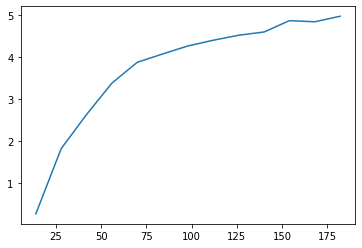

In [24]:
days = [i for i in range(14, 14*MAX_PERIODS, 14)]
plt.plot(days, avg_gains)

The above graph shows a clear trend that the longer a person with anxiety (GAD-7 score of 10 or higher) participates in therapy, the more points he or she can expect to shave off of his or her score. It also appears that the biggest absolute differences in GAD-7 scores (i.e., the steepest slopes) appear to be ealiest on in treatment. 

This could be for a variety of reasons. The first is that only people really struggling continued seeking therapy, making the improvements somewhat muted in the later weeks. Additionally, it is possible that the GAD-7 scores were evetually low enough that an asymptote was reached, as it is reasonable to think that even healthy individuals experience *some* kind of anxiety during a given two-week period. 

A t-test or equivalent statistical measurement should be conducted to determine whether or not this perceived efficacy is statistically significant, and the average percentage changes should also be evaluated to accompany the average absolute changes depicted above. 

